## What is Feature Engineering

Feature engineering is a crucial step in the __data pre-processing phase__ of machine learning,
where data scientists and machine learning engineers create new features or modify existing
ones to improve the performance of machine learning models. 



The goal of feature engineering
is to provide the model with informative, non-redundant, and interpretable data that captures
the underlying structure of the dataset. 


This process can significantly enhance model accuracy
and performance by leveraging domain knowledge and mathematical transformations.

### Key Aspects of Feature Engineering Include:

1. __Creation of New Features :__ Involves generating new features from the existing data, which
might be more relevant to the prediction task. This could include combining two or more
features, extracting parts of a date-time stamp (like the day of the week, month, or year), or
creating interaction terms that capture the relationship between different variables.


2. __Feature Transformation :__ Applying transformations to features to change their distribution or
scale. Common transformations include normalization, standardization, log transformation,
and power transformations. These are especially important for algorithms that assume data is
normally distributed or algorithms sensitive to the scale of features, like k-nearest Neighbors
(KNN) and gradient descent-based algorithms.


3. __Feature Selection :__ Identifying the most relevant features to use in model training. This involves
removing irrelevant, redundant, or noisy data that can detract from model performance.
Techniques for feature selection include filter methods, wrapper methods, and embedded
methods.


4. __Feature Extraction :__ Techniques like Principal Component Analysis (PCA), Linear Discriminant
Analysis (LDA), and t-distributed Stochastic Neighbour Embedding (t-SNE) are used to reduce
the number of features in a dataset while retaining as much of the variance in the data as
possible. This is particularly useful for high-dimensional data.


5. __Handling Missing Values :__ Developing strategies for dealing with missing data, such as
imputation (filling in missing values with the mean, median, mode, or using more complex
algorithms), or creating binary indicators that signal whether data was missing.


6. __Encoding Categorical Variables :__ Converting categorical variables into a form that can be
provided to ML models to improve performance. This includes using techniques like one-hot
encoding, label encoding, and target encoding.


7. __Working with different modalities :__ Feature engineering also includes applying all the above
techniques to different modalities of data like temporal, textual and geospatial data.


Feature engineering is often considered more of an art than a science, requiring creativity,
intuition, and domain knowledge. The quality and relevance of the features used can often
make a more significant difference in the performance of a machine learning model than the
choice of model itself. It enables models to learn better from the data, leading to more
accurate predictions.

### Feature Engineering roadmap : 

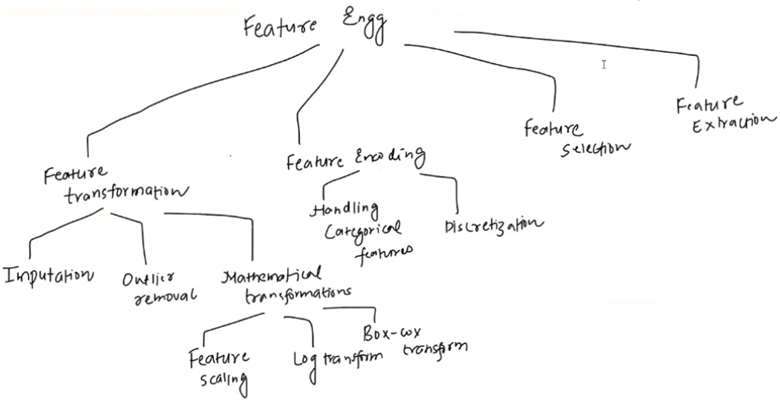

### NOTE : Feature Selection covered in DSMP1

# Encoding Categorical Data

Data is of two types:

1. Numerical


2. Categorical
    
    
    - Ordinal - There is order in the categorical data.
    eg: review system
    
    
    - Nominal -  There is no relation or order between the data.
     eg: states of the country, gender
    
    

### Types of Encoding

__1. Ordinal Encoding:__ Done on Ordinal data (data with order)


__2. OneHot Encoding:__ On Nominal Data

If any one of the input column has ordinal categorical data then we will use Ordinal Encoding, but if output is categorical data then we use __Label Encoder__ from sklearn

For input columns we use Ordinal Encoding

For output columns we use Label Encoding

## 1. Ordinal Encoding

Ordinal encoding is a method for transforming categorical variables that have a
natural order or ranking among the categories into numerical values. This
technique assigns integers to the categories according to their relative order.

### NOTE: Label Encoding will only be used on Output column, not on Input column

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('customer.csv')

In [3]:
df.sample(5)

,age,gender,review,education,purchased
49,25,Female,Good,UG,No
40,39,Male,Good,School,No
23,96,Female,Good,School,No
24,16,Female,Average,PG,Yes
4,16,Female,Average,UG,No


In [4]:
df = df.iloc[:,2:]

In [5]:
df.head()

# target is also a categorical column

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [6]:
df.dtypes

review       object
education    object
purchased    object
dtype: object

In [7]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 2), (10, 2), (40,), (10,))

In [11]:
X_train.head()

,review,education
33,Good,PG
35,Poor,School
26,Poor,PG
34,Average,School
18,Good,School


#### applying OrdinalEncoding on input columns

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
oe = OrdinalEncoder(categories = [['Poor', 'Average', 'Good'],['School','UG','PG']]) # in ascending order of value

In [14]:
X_train.head()

,review,education
33,Good,PG
35,Poor,School
26,Poor,PG
34,Average,School
18,Good,School


In [15]:
X_train_trf = oe.fit_transform(X_train)
X_train_trf

array([[2., 2.],
       [0., 0.],
       [0., 2.],
       [1., 0.],
       [2., 0.],
       [0., 0.],
       [0., 2.],
       [0., 2.],
       [2., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [2., 2.],
       [1., 0.],
       [0., 2.],
       [1., 1.],
       [1., 0.],
       [2., 0.],
       [1., 0.],
       [0., 1.],
       [2., 0.],
       [2., 1.],
       [0., 1.],
       [0., 0.],
       [1., 2.],
       [1., 2.],
       [2., 0.],
       [2., 0.],
       [2., 1.],
       [1., 2.],
       [0., 2.],
       [2., 1.],
       [0., 2.],
       [0., 2.],
       [2., 2.],
       [1., 0.],
       [2., 2.],
       [1., 1.]])

In [16]:
X_test_trf = oe.transform(X_test)

In [17]:
X_test_trf

array([[0., 0.],
       [2., 1.],
       [2., 1.],
       [2., 2.],
       [2., 2.],
       [0., 2.],
       [2., 0.],
       [0., 0.],
       [0., 2.],
       [1., 1.]])

In [18]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

In [19]:
oe.feature_names_in_ # on what columns ordinal is applied

array(['review', 'education'], dtype=object)

In [20]:
oe.n_features_in_ #number of columns ordinal is applied

2

In [21]:
oe.inverse_transform(np.array([0,2]).reshape(1,2))

array([['Poor', 'PG']], dtype=object)

### Handle unkown categories

In [22]:
# handle unknown
oe.transform(np.array(['Poor','college']).reshape(1,2))

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


ValueError: Found unknown categories ['college'] in column 1 during transform

### solution :
> __handle_unknown = 'use_encoded_value'__

> ___unknown_value = -1___

In [23]:
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']],
                    handle_unknown='use_encoded_value',
                    unknown_value=-1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:2], df.iloc[:,-1], test_size=0.2)
X_train = oe.fit_transform(X_train)

##### college is an unknown category:

In [25]:
oe.transform(np.array(['Poor','college']).reshape(1,2))

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[ 0., -1.]])

## 2. Label Encoding the output Column

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
y_train_trf = le.fit_transform(y_train)
y_test_trf = le.transform(y_test)

In [29]:
y_train_trf

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [30]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [43]:
le.inverse_transform(np.array([1,1,0]))

array(['Yes', 'Yes', 'No'], dtype=object)

In [31]:
X_train.shape, X_test.shape

((40, 2), (10, 2))

In [32]:
X_train_trf.shape, X_test_trf.shape

((40, 2), (10, 2))

## NOTE:
By default, OrdinalEncoder uses a lexicographical strategy to map string category labels to integers. This strategy is arbitrary and often meaningless. For instance, suppose the dataset has a categorical variable named "size" with categories such as “S”, “M”, “L”, “XL”. We would like the integer representation to respect the meaning of the sizes by mapping them to increasing integers such as 0, 1, 2, 3. However, the lexicographical strategy used by default would map the labels “S”, “M”, “L”, “XL” to 2, 1, 0, 3, by following the alphabetical order.

The OrdinalEncoder class accepts a categories constructor argument to pass categories in the expected ordering explicitly. You can find more information in the scikit-learn documentation if needed.

### Rare Categories

Frequency of a particular category is very less as compared to other categories.

Infrequent categories, often referred to as "rare categories," are categories
within a categorical variable that appear very seldom in the dataset. These
categories are characterized by having a low frequency or count compared to
other categories within the same feature.

#### How to handle: 

1. __Aggregation :__ Combining rare categories into a single "Other" category to reduce
the feature's cardinality and simplify the model.


2. __Encoding with Special Treatment :__ Using encoding techniques that specifically
account for the rarity of categories, such as setting a min_frequency or
max_categories threshold in OrdinalEncoder, or employing target encoding
where the influence of rare categories is mitigated.


3. __Exclusion :__ In some cases, particularly when a category is extremely rare, it might
be justified to exclude those data points from the analysis if it's believed they
do not add value or could introduce noise.

In [159]:
# handling infrequent categories
X = np.array([['dog'] * 5 + ['cat'] * 20 + ['rabbit'] * 10 +['snake'] * 3 + ['horse'] * 2], dtype=object).T
X

array([['dog'],
       ['dog'],
       ['dog'],
       ['dog'],
       ['dog'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['cat'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['rabbit'],
       ['snake'],
       ['snake'],
       ['snake'],
       ['horse'],
       ['horse']], dtype=object)

##### max_categories: not very useful

> max_categires = 3 so any category apart from 1,2 will be considered as 'other'. so __[1, 2, other] will be the 3 categories__

In [160]:
enc = OrdinalEncoder(max_categories=3).fit(X)

In [161]:
enc.infrequent_categories_ # dog, snake, horse becomes the third category

[array(['dog', 'horse', 'snake'], dtype=object)]

In [162]:
enc.transform(np.array([['cat','rabbit','snake','dog']]).reshape(4,1))

array([[0.],
       [1.],
       [2.],
       [2.]])

##### min_frequency : useful

> min_frequency = 4, categories having freq less than 4 will be considered as __others__.

In [163]:
enc = OrdinalEncoder(min_frequency=4).fit(X)

In [164]:
enc.infrequent_categories_ # categories which has freq less than 4 

[array(['horse', 'snake'], dtype=object)]

##### horse, snake gets 3 as category as it will fall in other as it has less than 4 frequency

In [40]:
enc.transform(np.array([['cat','rabbit','snake','dog','horse']]).reshape(5,1))

array([[0.],
       [2.],
       [3.],
       [1.],
       [3.]])

### Handling missing data in Ordinal Encoder:

In [41]:
# Example categorical data with missing values
data = [['Cat'], [np.nan], ['Dog'], ['Fish'], [np.nan]]
data

[['Cat'], [nan], ['Dog'], ['Fish'], [nan]]

In [42]:
# Setting encoded_missing_value to -1, indicating we want missing values to be encoded as -1
encoder = OrdinalEncoder(encoded_missing_value=-1)

encoded_data = encoder.fit_transform(data)

print(encoded_data)

[[ 0.]
 [-1.]
 [ 1.]
 [ 2.]
 [-1.]]


## 3. One Hot Encoding

We don't have any order for the categories. so we can't use ordinal encoding.

New column for each category

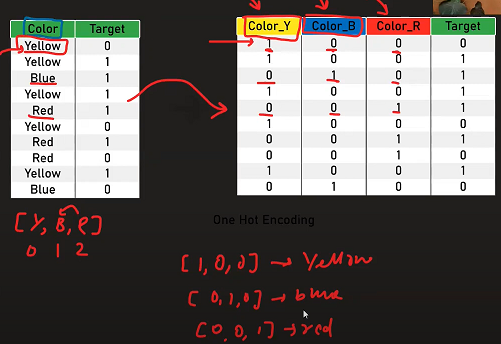

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelBinarizer, OneHotEncoder

In [2]:
df = pd.read_csv(r'cars.csv')
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [3]:
df.shape

(8128, 5)

In [4]:
df.dtypes

brand            object
km_driven         int64
fuel             object
owner            object
selling_price     int64
dtype: object

In [5]:
df['brand'].value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64

In [6]:
df['brand'].nunique() # 32 types of brands

32

In [7]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [8]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

### One-Hot Encoding using Pandas

In [9]:
pd.get_dummies(df,columns=['fuel','owner']).head()

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0


In [10]:
pd.get_dummies(df,columns=['fuel','owner']).shape

(8128, 12)

### OneHot Encoder (Sklearn)

In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelBinarizer, OneHotEncoder

In [86]:
cars = pd.read_csv('cars.csv')
cars.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [87]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [88]:
df.shape

(8128, 5)

In [89]:
X = cars.iloc[:,[0,2,3]]
y = cars.iloc[:,-1]

In [90]:
X

,brand,fuel,owner
0,Maruti,Diesel,First Owner
1,Skoda,Diesel,Second Owner
2,Honda,Petrol,Third Owner
3,Hyundai,Diesel,First Owner
4,Maruti,Petrol,First Owner
...,...,...,...
8123,Hyundai,Petrol,First Owner
8124,Hyundai,Diesel,Fourth & Above Owner
8125,Maruti,Diesel,First Owner
8126,Tata,Diesel,First Owner


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [92]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((6502, 3), (1626, 3), (6502,), (1626,))

In [93]:
X_train['fuel'].nunique()

4

In [94]:
X_train['brand'].nunique()

31

In [95]:
X_train.head()

,brand,fuel,owner
5571,Hyundai,Diesel,First Owner
2038,Jeep,Diesel,First Owner
2957,Hyundai,Petrol,First Owner
7618,Mahindra,Diesel,Second Owner
6684,Hyundai,Diesel,First Owner


In [96]:
from sklearn.preprocessing import OneHotEncoder

In [97]:
ohe = OneHotEncoder(sparse_output=False, dtype=np.int32)

#### applying ohe

In [99]:
pd.DataFrame(ohe.fit_transform(X_train),columns=ohe.get_feature_names_out())

,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,brand_Honda,...,brand_Volvo,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6497,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
6498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
6499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
6500,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


##### get column names

In [82]:
ohe.get_feature_names_out()

array(['brand_Ambassador', 'brand_Audi', 'brand_BMW', 'brand_Chevrolet',
       'brand_Daewoo', 'brand_Datsun', 'brand_Fiat', 'brand_Force',
       'brand_Ford', 'brand_Honda', 'brand_Hyundai', 'brand_Isuzu',
       'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land',
       'brand_Lexus', 'brand_MG', 'brand_Mahindra', 'brand_Maruti',
       'brand_Mercedes-Benz', 'brand_Mitsubishi', 'brand_Nissan',
       'brand_Opel', 'brand_Peugeot', 'brand_Renault', 'brand_Skoda',
       'brand_Tata', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo',
       'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'owner_First Owner', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype=object)

In [79]:
ohe.categories_

[array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
        'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
        'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti',
        'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
        'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
       dtype=object),
 array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object),
 array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
        'Test Drive Car', 'Third Owner'], dtype=object)]

In [80]:
ohe.n_features_in_ # number of columns on which ohe was applied

3

In [21]:
ohe.get_feature_names_out()

array(['fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'owner_First Owner', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype=object)

In [68]:
# using horizontal np stacking

np.hstack((X_train[['brand','km_driven']].values, X_train_new))

array([['Hyundai', 35000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Jeep', 60000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Hyundai', 25000, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       ['Tata', 15000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Maruti', 32500, 0.0, ..., 1.0, 0.0, 0.0],
       ['Isuzu', 121000, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [69]:
np.hstack((X_train[['brand','km_driven']].values, X_train_new)).shape

(6502, 11)

#### Doing everything again with dropping first column of each category and sparse = False

In [70]:
# drop first column of each category and sparse = False will replace toarray() thing and dtype=int
ohe = OneHotEncoder(drop = 'first',sparse=False,dtype=np.int32)

TypeError: __init__() got an unexpected keyword argument 'sparse'

In [71]:
X_train_new = ohe.fit_transform(X_train[['fuel','owner']])
print(X_train_new.shape)
X_train_new

(6502, 9)


<6502x9 sparse matrix of type '<class 'numpy.float64'>'
	with 13004 stored elements in Compressed Sparse Row format>

In [102]:
X_test_new = ohe.transform(X_test[['fuel','owner']])
print(X_test_new.shape)
X_test_new

(1626, 7)


array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [103]:
# using horizontal np stacking

np.hstack((X_train[['brand','km_driven']].values, X_train_new))

array([['Hyundai', 35000, 1, ..., 0, 0, 0],
       ['Jeep', 60000, 1, ..., 0, 0, 0],
       ['Hyundai', 25000, 0, ..., 0, 0, 0],
       ...,
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ['Maruti', 32500, 1, ..., 1, 0, 0],
       ['Isuzu', 121000, 1, ..., 0, 0, 0]], dtype=object)

In [104]:
np.hstack((X_train[['brand','km_driven']].values, X_train_new)).shape

# 2 columns have been dropped

(6502, 9)

#### doing all this coz we have not studied Column transformer

### Dummy- Variable Trap

The Dummy Variable Trap occurs when two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models. In other words, the individual effect of the dummy variables on the prediction model can not be interpreted well because of multicollinearity.


To overcome the Dummy variable Trap, we drop one of the columns created when the categorical variables were converted to dummy variables by one-hot encoding. This can be done because the dummy variables include redundant information.


for "n" categories we will have "n" columns called ___"dummy variables"___. But we remove one columns and are left with __"n-1" column.__ 

This is done to avoid "Multicollinearity"


Creates more issue for Linear and Logistic Regression.

 

In [124]:
X = cars.iloc[:,[0,2]]
y = cars.iloc[:,-1]

In [125]:
X

,brand,fuel
0,Maruti,Diesel
1,Skoda,Diesel
2,Honda,Petrol
3,Hyundai,Diesel
4,Maruti,Petrol
...,...,...
8123,Hyundai,Petrol
8124,Hyundai,Diesel
8125,Maruti,Diesel
8126,Tata,Diesel


In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### n-1 OneHot Encoding (n categories)

### drop = First : 

In [127]:
ohe = OneHotEncoder(drop='first',sparse_output=False)

In [128]:
X_train.shape, X_test.shape

((6502, 2), (1626, 2))

In [129]:
ohe.fit_transform(X_train).shape

(6502, 34)

##### index of column which has been dropped:

In [130]:
ohe.drop_idx_

# 1st category of 1st column
# 1st category of 2nd column

array([0, 0], dtype=object)

### 4. Handling rare/uncommon categories

In [139]:
X_train['brand'].value_counts()

Maruti           1953
Hyundai          1127
Mahindra          635
Tata              586
Toyota            391
Honda             369
Ford              320
Chevrolet         185
Renault           183
Volkswagen        154
BMW                96
Skoda              82
Nissan             62
Jaguar             59
Volvo              54
Datsun             48
Mercedes-Benz      43
Fiat               35
Audi               30
Jeep               26
Lexus              22
Mitsubishi         13
Force               6
Land                5
Kia                 4
Ambassador          3
MG                  3
Daewoo              3
Isuzu               2
Ashok               1
Peugeot             1
Opel                1
Name: brand, dtype: int64

In [182]:
(X_train['brand'].value_counts()>=100).sum() # categories less than 100 freq

10

In [181]:
(X_train['brand'].value_counts()<100).sum() # categories less than 100 freq

22

In [140]:
cars['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

#### using min frequency :  CNG and LPG will merge into others as they have freq less than 100

In [141]:
ohe = OneHotEncoder(sparse_output=False, min_frequency=100)
ohe.fit_transform(X_train).shape

(6502, 14)

##### brand_infrequent_sklearn and fuel_infrequent_sklearn are the others column:

In [142]:
ohe.get_feature_names_out()

array(['brand_Chevrolet', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Mahindra', 'brand_Maruti', 'brand_Renault', 'brand_Tata',
       'brand_Toyota', 'brand_Volkswagen', 'brand_infrequent_sklearn',
       'fuel_Diesel', 'fuel_Petrol', 'fuel_infrequent_sklearn'],
      dtype=object)

In [143]:
# using max_categories
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', max_categories=15)
ohe.fit_transform(X_train).shape

(6502, 19)

#### how  the training data looks after one hot encoding

In [183]:
pd.DataFrame(ohe.fit_transform(X_train),columns=ohe.get_feature_names_out())

,brand_BMW,brand_Chevrolet,brand_Ford,brand_Honda,brand_Hyundai,brand_Jaguar,brand_Mahindra,brand_Maruti,brand_Nissan,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_infrequent_sklearn,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6499,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##### passing unknown category : 'local'

In [136]:
# how to handle unknown category
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

ohe = OneHotEncoder(drop='first',sparse_output=False)
ohe.fit_transform(X_train)

ohe.transform(np.array(['local','Petrol']).reshape(1,2))

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


ValueError: Found unknown categories ['local'] in column 0 during transform

#### handling unknown category : ignoring the unkown category

In [137]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit_transform(X_train)

ohe.transform(np.array(['local','Petrol']).reshape(1,2))

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.]])

In [138]:
ohe.inverse_transform(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.]).reshape(1,36))

array([[None, 'Petrol']], dtype=object)

### pd.getdummies:

In [85]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


In [86]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True).shape # 1st column of both categories has been dropped

(8128, 10)

##### Issue with pd.get_dummies: 

pandas doesnot remembers which column was in which position after oneHot encoding. Position of columns may change

#### OneHot Encoding for Uncommon/Rare Categories using pd.get dummies:

In [105]:
df['brand'].value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64

In [106]:
counts = df['brand'].value_counts()

##### threshold = 100 cars

In [107]:
df['brand'].nunique()
threshold = 100

In [108]:
repl = counts[counts <= threshold].index
repl

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Force', 'Land', 'Isuzu', 'Kia',
       'Ambassador', 'Daewoo', 'MG', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object')

In [109]:
pd.get_dummies(df['brand'].replace(repl, 'uncommon')).sample(5)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
6907,0,0,0,0,1,0,0,0,0,0,0,0,0
3638,0,0,0,0,0,0,1,0,0,0,0,0,0
268,0,0,0,0,1,0,0,0,0,0,0,0,0
5834,0,0,0,0,0,1,0,0,0,0,0,0,0
7768,0,0,0,0,0,0,0,1,0,0,0,0,0


- Encoding high cardinality categorical features - https://www.kaggle.com/general/16927



- Feature hashing - https://datasciencestunt.com/dealing-with-categorical-features-with-high-cardinality-feature-hashing/

#### One Hot Encoding vs get dummies:

1. The get_dummies can’t handle the unknown category during the transformation natively. You have to apply some techniques to handle it. But it is not efficient. 

    On the other hand, OneHotEncoder will natively handle unknown categories. All you need to do is set the parameter handle_unknown='ignore' to OneHotEncoder.

    For example, in the tips dataset, the day column contains four unique values — Thur, Fri, Sat, and Sun. If the test dataset contains a new category, say Mon or Tue, then the get dummies will create a new column day_Mon or day_Tue which will be inconsistent with train data and will eventually fail during the model building process.



2. If you want to put your machine learning model into production, Scikit-learn Pipeline will be very useful. But, get_dummies is not compatible with the Scikit-learn pipeline. It requires you to create your own transformer. On the other hand, OneHotEncoder is compatible with the Scikit-learn pipeline.

https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc

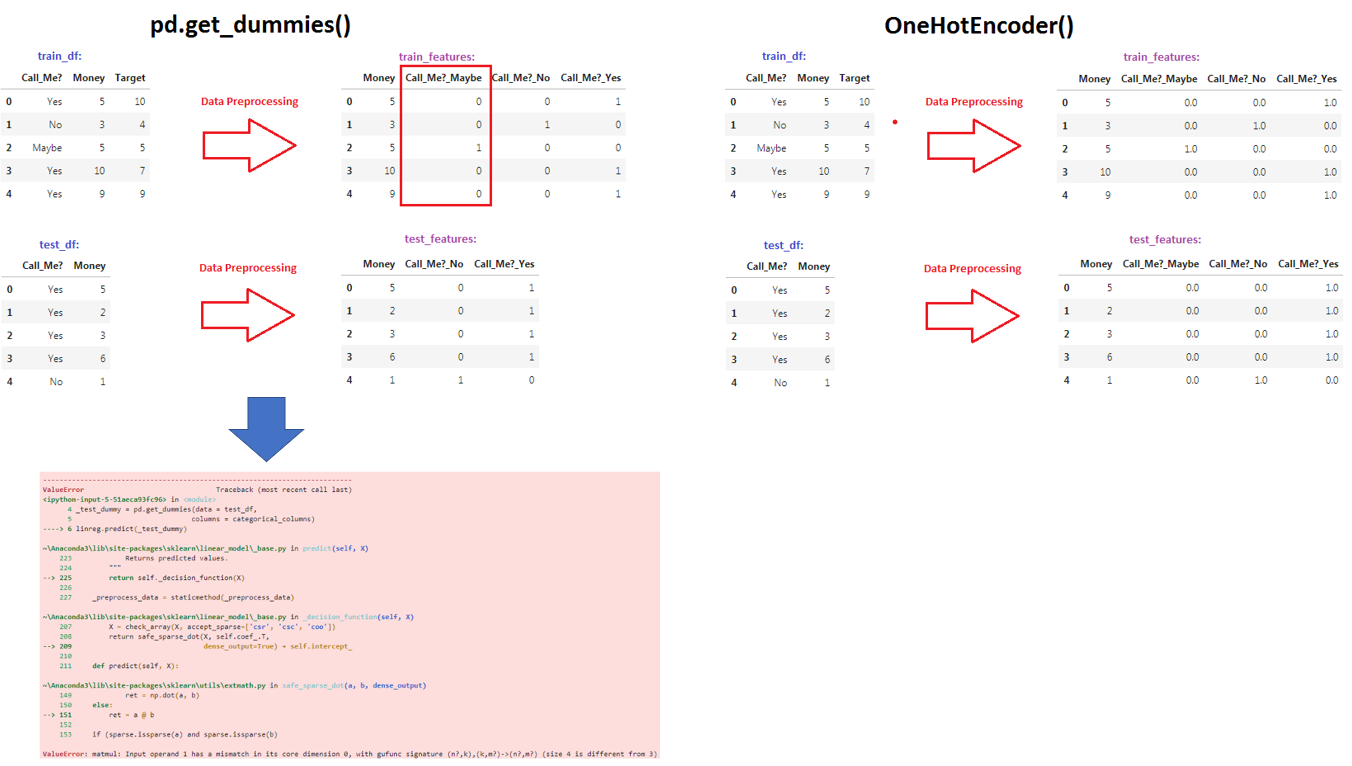

## 5. LabelBinarizer (used on target column)

similar to one hot encoding but on target column. used in deep learning(Softmax)

The LabelBinarizer in scikit-learn is a class used to transform multi-class labels to binary
labels (1 vs all). 


Essentially, it's used for one-hot encoding of labels. This is particularly useful
in classification tasks where you need to convert categorical target variables into a format
that's suitable for machine learning models, especially those that require a binary or one-hot
encoded format for the target variable.



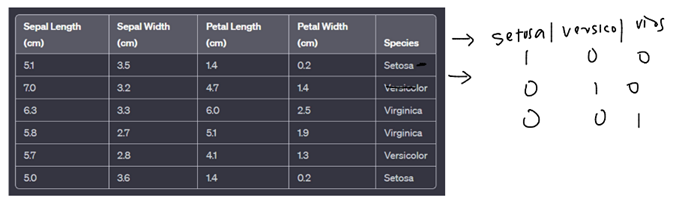

In [147]:
from sklearn.preprocessing import LabelBinarizer

# Sample target variable for a multi-class classification problem
y = ['cat', 'dog', 'fish', 'dog', 'cat']
y

['cat', 'dog', 'fish', 'dog', 'cat']

In [148]:
# Initialize the LabelBinarizer
lb = LabelBinarizer()

In [149]:
# Fit and transform the target variable
y_binarized = lb.fit_transform(y)

print("Binarized labels:\n", y_binarized)

Binarized labels:
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]


In [150]:
# Inverse transform to recover original labels
y_original = lb.inverse_transform(y_binarized)

print("Original labels:\n", y_original)

Original labels:
 ['cat' 'dog' 'fish' 'dog' 'cat']


#### Multilabel classification:

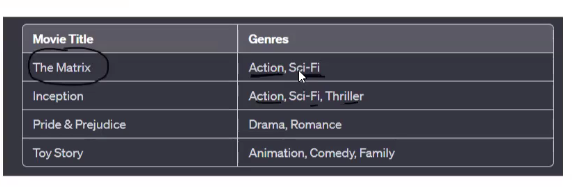

In [151]:
from sklearn.preprocessing import MultiLabelBinarizer

In [152]:
# Example multi-label data
y = [('red', 'blue'), ('blue', 'green'), ('green',), ('red',)]
y

[('red', 'blue'), ('blue', 'green'), ('green',), ('red',)]

In [155]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [156]:
# Fit and transform the data to binary matrix format
Y = mlb.fit_transform(y)

print("Binary matrix:\n", Y)
print("Class labels:", mlb.classes_)

Binary matrix:
 [[1 0 1]
 [1 1 0]
 [0 1 0]
 [0 0 1]]
Class labels: ['blue' 'green' 'red']


In [157]:
# Inverse transform to recover original labels
y_inv = mlb.inverse_transform(Y)
print("Inverse transformed labels:", y_inv)

Inverse transformed labels: [('blue', 'red'), ('blue', 'green'), ('green',), ('red',)]


### Four more techniques to Encode Categorical data : 

1. __Count Encoder__


2. __Binary encoder__


3. __Target Encoder__


4. __Weight of Evidence (WOE)__

## Category Encoder library : https://contrib.scikit-learn.org/category_encoders/

## 6. Count and Frequency Encoder (not used much)

### Count Encoder:

A count encoder is a technique to transforms each categorical value into a number representing the
frequency of that value in the dataset. 


This method is particularly useful for converting
categorical variables into a format that can be more easily used by various machine learning
algorithms, which typically require numerical input.

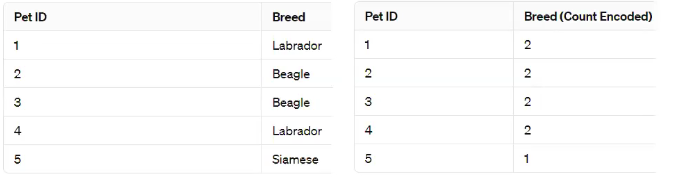

### Code

In [185]:
# dataset generation
import pandas as pd
import numpy as np
import category_encoders as ce

In [186]:
# Simulating a dataset
data = {
    'Age': np.random.randint(20, 60, size=100).astype(float),  # Random ages between 20 and 60
    'State': np.random.choice(['Karnataka', 'Tamil Nadu', 'Maharashtra', 'Delhi', 'Telangana'], size=100),
    'Education': np.random.choice(['High School', 'UG', 'PG'], size=100),
    'Package': np.random.rand(100) * 100  # Random package values for demonstration
}

data

{'Age': array([30., 27., 53., 59., 37., 44., 43., 46., 39., 25., 36., 20., 26.,
        48., 51., 53., 59., 39., 32., 48., 47., 32., 21., 24., 35., 37.,
        59., 31., 48., 29., 54., 56., 32., 38., 29., 51., 47., 44., 55.,
        37., 44., 52., 22., 34., 51., 30., 27., 59., 56., 55., 42., 50.,
        28., 54., 48., 27., 48., 41., 25., 37., 22., 35., 49., 39., 53.,
        30., 28., 56., 57., 32., 54., 38., 43., 44., 36., 45., 42., 41.,
        40., 20., 55., 56., 40., 21., 20., 25., 34., 28., 25., 39., 49.,
        35., 44., 25., 50., 44., 23., 59., 55., 31.]),
 'State': array(['Tamil Nadu', 'Telangana', 'Delhi', 'Maharashtra', 'Telangana',
        'Maharashtra', 'Delhi', 'Tamil Nadu', 'Karnataka', 'Tamil Nadu',
        'Telangana', 'Tamil Nadu', 'Tamil Nadu', 'Tamil Nadu', 'Delhi',
        'Tamil Nadu', 'Telangana', 'Telangana', 'Tamil Nadu', 'Delhi',
        'Karnataka', 'Telangana', 'Maharashtra', 'Telangana',
        'Maharashtra', 'Tamil Nadu', 'Telangana', 'Tamil Nadu',
    

In [187]:
# Introducing missing values in 'Age' column (5%)
np.random.seed(0)  # For reproducibility
missing_indices = np.random.choice(data['Age'].shape[0], replace=False, size=int(data['Age'].shape[0] * 0.05))
data['Age'][missing_indices] = np.nan

df = pd.DataFrame(data)

df.head()

,Age,State,Education,Package
0,30.0,Tamil Nadu,High School,8.190565
1,27.0,Telangana,High School,80.577060
2,NaN,Delhi,UG,93.759421
3,59.0,Maharashtra,UG,42.433186
4,37.0,Telangana,UG,84.720139


In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Package']), df['Package'], test_size=0.2, random_state=42)

In [189]:
X_train

,Age,State,Education
55,NaN,Tamil Nadu,UG
88,25.0,Tamil Nadu,High School
26,NaN,Telangana,UG
42,22.0,Karnataka,UG
69,32.0,Tamil Nadu,High School
...,...,...,...
60,22.0,Tamil Nadu,High School
71,38.0,Tamil Nadu,UG
14,51.0,Delhi,PG
92,44.0,Delhi,PG


In [190]:
X_train['State'].value_counts()

Tamil Nadu     25
Karnataka      15
Delhi          15
Telangana      14
Maharashtra    11
Name: State, dtype: int64

In [191]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import sklearn

In [192]:
class CountEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.count_map = {}

    def fit(self, X, y=None):
        if self.columns is None:
            self.columns = X.columns
        for col in self.columns:
            self.count_map[col] = X[col].value_counts().to_dict()
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = X[col].map(self.count_map[col]).fillna(0)
        return X

In [193]:
preprocessor = ColumnTransformer(
    transformers=[
        ('age_missing', SimpleImputer(strategy='mean'), ['Age']),
        ('cat_state', CountEncoder(), ['State']),
        ('education_ordinal', OrdinalEncoder(), ['Education'])
    ])

sklearn.set_config(transform_output="pandas")

In [194]:
preprocessor.fit_transform(X_train)

,age_missing__Age,cat_state__State,education_ordinal__Education
55,39.826667,25,2.0
88,25.000000,25,0.0
26,39.826667,14,2.0
42,22.000000,15,2.0
69,32.000000,25,0.0
...,...,...,...
60,22.000000,25,0.0
71,38.000000,25,2.0
14,51.000000,15,1.0
92,44.000000,15,1.0


### using category encoders

In [216]:
from category_encoders.count import CountEncoder

#### for count encoder to be applied, CountEncoder(normalise=False)

In [217]:
preprocessor = ColumnTransformer(
    transformers=[
        ('age_missing', SimpleImputer(strategy='mean'), ['Age']),
        ('cat_state', CountEncoder(), ['State']),
        ('education_ordinal', OrdinalEncoder(), ['Education'])
    ])
sklearn.set_config(transform_output="pandas")

In [218]:
preprocessor.fit_transform(X_train)

,age_missing__Age,cat_state__State,education_ordinal__Education
55,39.826667,25,2.0
88,25.000000,25,0.0
26,39.826667,14,2.0
42,22.000000,15,2.0
69,32.000000,25,0.0
...,...,...,...
60,22.000000,25,0.0
71,38.000000,25,2.0
14,51.000000,15,1.0
92,44.000000,15,1.0


### Code (Another Example)

In [221]:
# parameters
import pandas as pd
import numpy as np
import category_encoders as ce

In [222]:
# Simulating a dataset
np.random.seed(42)  # For reproducibility
data = {
    'State': np.random.choice(['Karnataka', 'Tamil Nadu', 'Maharashtra', 'Delhi', 'Telangana', np.NaN], size=100),
    'Education': np.random.choice(['High School', 'UG', 'PG', np.NaN], size=100)
}

In [223]:
df = pd.DataFrame(data)

df.head(25)

,State,Education
0,Delhi,PG
1,Telangana,High School
2,Maharashtra,High School
3,Telangana,High School
4,Telangana,PG
5,Tamil Nadu,High School
6,Maharashtra,nan
7,Maharashtra,High School
8,Maharashtra,nan
9,Telangana,nan


In [202]:
df.isnull().sum()

State        0
Education    0
dtype: int64

### Initialize the CountEncoder with various parameters

In [203]:
encoder = ce.CountEncoder(
    cols=['State', 'Education'],  # Specify columns to encode. None would automatically select categorical columns.
    handle_missing='error',  # Treat NaNs as a countable category
    handle_unknown='error',  # Treat unknown categories as NaNs (if seen during transform but not in fit)
)

In [204]:
# Fit and transform the dataset
encoder.fit_transform(df)

#print(encoded_df.head(25))

,State,Education
0,25,34
1,17,27
2,11,27
3,17,27
4,17,34
...,...,...
95,25,27
96,25,16
97,17,23
98,11,23


In [205]:
encoder.mapping

{'State': Delhi          25
 Tamil Nadu     19
 Telangana      17
 nan            17
 Maharashtra    11
 Karnataka      11
 Name: State, dtype: int64,
 'Education': PG             34
 High School    27
 nan            23
 UG             16
 Name: Education, dtype: int64}

#### Bihar is unkwon value, so it will throw error => handling_unknown= 'error'

In [206]:
new_data = pd.DataFrame({'State': ['Bihar'], 'Education': ['UG']})

encoder.transform(new_data)

ValueError: Missing data found in column State at transform time.

### Now, handle_unkown='value'

In [224]:
encoder = ce.CountEncoder(
    cols=['State', 'Education'],  # Specify columns to encode. None would automatically select categorical columns.
    handle_missing='error',  # Treat NaNs as a countable category
    handle_unknown='value',  # Treat unknown categories as NaNs (if seen during transform but not in fit)
)

In [225]:
# Fit and transform the dataset
encoder.fit_transform(df)

#print(encoded_df.head(25))

,State,Education
0,25,34
1,17,27
2,11,27
3,17,27
4,17,34
...,...,...
95,25,27
96,25,16
97,17,23
98,11,23


In [226]:
encoder.mapping

{'State': Delhi          25
 Tamil Nadu     19
 Telangana      17
 nan            17
 Maharashtra    11
 Karnataka      11
 Name: State, dtype: int64,
 'Education': PG             34
 High School    27
 nan            23
 UG             16
 Name: Education, dtype: int64}

#### Now Bihar which is unkown value will  not throw error, it will be assigned a vlue

In [227]:
new_data = pd.DataFrame({'State': ['Bihar'], 'Education': ['UG']})

encoder.transform(new_data)

,State,Education
0,0.0,16


### Handing rare categories:

> **min_group_size, min_group_name, combine_min_nan_groups:**

In [228]:
np.random.seed(0)  # For reproducibility
data = {
    'Category': np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', np.nan], size=100, p=[0.3, 0.25, 0.15, 0.15, 0.05, 0.05, 0.05]),
    'Value': np.random.rand(100)
}

df = pd.DataFrame(data)

df.sample(10)


,Category,Value
91,C,0.209844
29,B,0.290078
2,C,0.735194
50,C,0.149448
44,C,0.806194
78,A,0.704414
33,C,0.298282
65,B,0.855803
75,A,0.223925
45,C,0.703889


In [229]:
df['Category'].value_counts()

A      34
B      22
C      21
D      12
nan     5
F       4
E       2
Name: Category, dtype: int64

In [233]:
encoder = ce.CountEncoder(
    cols=['Category'],
    min_group_size=7,  # Groups with counts less than 5 will be combined
    min_group_name='salman',  # Use default naming for combined minimum groups
)

In [234]:
# Fit and transform the dataset
encoded_df = encoder.fit_transform(df['Category'])
encoded_df

,Category
0,22
1,12
2,21
3,22
4,22
...,...
95,34
96,21
97,34
98,12


In [235]:
# Display the original and encoded data for comparison
df['Encoded'] = encoded_df
print(df.head(20))

   Category     Value  Encoded
0         B  0.677817       22
1         D  0.270008       12
2         C  0.735194       21
3         B  0.962189       22
4         B  0.248753       22
5         C  0.576157       21
6         B  0.592042       22
7         E  0.572252       11
8       nan  0.223082       11
9         B  0.952749       22
10        D  0.447125       12
11        B  0.846409       22
12        C  0.699479       21
13        F  0.297437       11
14        A  0.813798       34
15        A  0.396506       34
16        A  0.881103       34
17        D  0.581273       12
18        D  0.881735       12
19        E  0.692532       11


### categories with freq less than 7 will be merged in salman category

In [236]:
encoder.mapping

{'Category': A         34
 B         22
 C         21
 D         12
 salman    11
 Name: Category, dtype: int64}

### Frequency Encoder : (Not available in scikit learn)


A frequency encoder is a technique similar to count encoding, used in the pre-
processing of categorical data for machine learning models. 


While both methods
transform categorical values based on their occurrence in the dataset, frequency
encoding specifically converts each categorical value into a number representing
the __relative frequency or proportion of that value in the dataset__, rather than the
absolute count.

#### NOTE : Instead of count, Frequency Encoder uses Normalised Count.

$$\frac{\text{Count of that category}}{\text{Overall rows}}$$

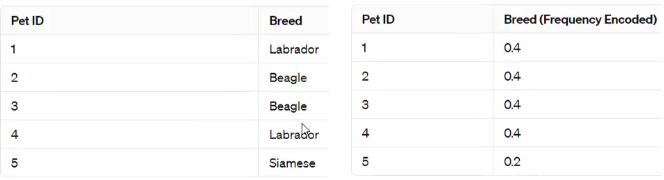

### for frequency encoder to be applied, CountEncoder(normalise=True)

In [219]:
preprocessor = ColumnTransformer(
    transformers=[
        ('age_missing', SimpleImputer(strategy='mean'), ['Age']),
        ('cat_state', CountEncoder(normalize=True), ['State']),
        ('education_ordinal', OrdinalEncoder(), ['Education'])
    ])
sklearn.set_config(transform_output="pandas")

In [220]:
preprocessor.fit_transform(X_train)

,age_missing__Age,cat_state__State,education_ordinal__Education
55,39.826667,0.3125,2.0
88,25.000000,0.3125,0.0
26,39.826667,0.1750,2.0
42,22.000000,0.1875,2.0
69,32.000000,0.3125,0.0
...,...,...,...
60,22.000000,0.3125,0.0
71,38.000000,0.3125,2.0
14,51.000000,0.1875,1.0
92,44.000000,0.1875,1.0


### Advantages

1. __Simple and Efficient__


2. __Reduces dimensionality__


3. __Captures frequency info__

### Disadvantages

1. __Collision__ : categories having same freq will hold same importance


2. __No info on categorical relationship__ : will lose info if order is present


3. __Handling of unseen categories__


4. __Data with skewed distributions(some categories having much more frequency) -> underappreciates the contribution of rare categories__

### Potential Use-cases


1. __High Cardinality__


2. __Imbalanced Dataset__


3. __Good for tree-based algo__

## 7. Binary Encoder (not used much)

##### (not present in scikit learn, only in only encoders)

Binary encoding is a technique used for converting categorical data into a numerical format
that machine learning algorithms can work with. 

Unlike one-hot encoding, which creates a
new binary column for each level of a categorical variable, binary encoding first converts the
categories into ordinal numbers, then __transforms those ordinal numbers into binary code__, and
finally splits the bits of the binary code into separate columns. 

This method is particularly
useful for dealing with high cardinality categorical data, as it significantly reduces the
dimensionality compared to one-hot encoding.

##### for 8 categories, only 4 columns used: binary number is based on item number

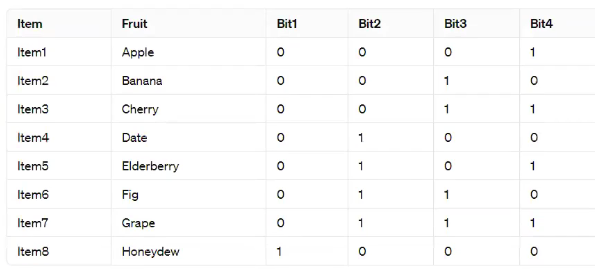

In [237]:
import pandas as pd
import category_encoders as ce

# Sample dataset
data = {
    'Item': ['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
    'Fruit': ['Apple', 'Banana', 'Cherry', 'Date', 'Elderberry', 'Fig', 'Grape', 'Honeydew']
}
df = pd.DataFrame(data)

df


,Item,Fruit
0,Item1,Apple
1,Item2,Banana
2,Item3,Cherry
3,Item4,Date
4,Item5,Elderberry
5,Item6,Fig
6,Item7,Grape
7,Item8,Honeydew


In [238]:
# Initialize the Binary Encoder
encoder = ce.BinaryEncoder(cols=['Fruit'], return_df=True)

# Fit and transform the data
df_encoded = encoder.fit_transform(df)

# Display the original and encoded data
print(df_encoded)

    Item  Fruit_0  Fruit_1  Fruit_2  Fruit_3
0  Item1        0        0        0        1
1  Item2        0        0        1        0
2  Item3        0        0        1        1
3  Item4        0        1        0        0
4  Item5        0        1        0        1
5  Item6        0        1        1        0
6  Item7        0        1        1        1
7  Item8        1        0        0        0


### Advantages

1. __Reduced Dimensionality (Memory Efficient)__


2. __Handling of new category__

### Disadvantages

1. __Loss of interpretation__

### Use-Cases


1. __High Cardinality features__


2. __Tree-based models__

## 8. Target Encoder / Mean Encoder (Imp)

Target encoding, also known as mean encoding, is a technique for encoding categorical
variables where each category is replaced with the mean value of the target variable for that
category. 

It's a form of feature engineering that can help machine learning models understand
and leverage the relationship between categorical features and the target variable more
effectively.

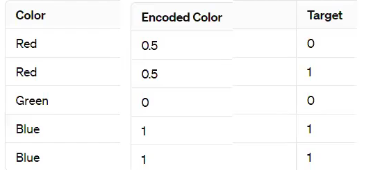

### NOTE : Works both on classification and regression problems

### using category_encoder : 

In [239]:
import pandas as pd
import category_encoders as ce

# Sample data
data = {
    'Feature': ['A', 'B', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Target': [1, 0, 0, 1, 1, 1, 0, 1]
}
df = pd.DataFrame(data)
df

,Feature,Target
0,A,1
1,B,0
2,A,0
3,B,1
4,C,1
5,A,1
6,B,0
7,C,1


In [240]:
# Separating the feature and target columns
X = df.drop('Target', axis=1)
y = df['Target']

# Initialize the TargetEncoder
encoder = ce.TargetEncoder(cols=['Feature'])

# Fit the encoder using the feature data and target variable
encoder.fit(X, y) # need to send target column too

# Transform the data
encoded = encoder.transform(X)

# Show the original and encoded data
print(pd.concat([df, encoded], axis=1))

   Feature  Target   Feature
0        A       1  0.631436
1        B       0  0.579948
2        A       0  0.631436
3        B       1  0.579948
4        C       1  0.678194
5        A       1  0.631436
6        B       0  0.579948
7        C       1  0.678194


In [241]:
encoder.mapping

{'Feature': Feature
  1    0.631436
  2    0.579948
  3    0.678194
 -1    0.625000
 -2    0.625000
 dtype: float64}

### using sklearn

In [244]:
import pandas as pd
from sklearn.preprocessing import TargetEncoder

# Sample data
data = {
    'Feature': ['A', 'B', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Target': [1, 0, 0, 1, 1, 1, 0, 1]
}
df = pd.DataFrame(data)
df

,Feature,Target
0,A,1
1,B,0
2,A,0
3,B,1
4,C,1
5,A,1
6,B,0
7,C,1


In [243]:
# Separating the feature and target columns
X = df.drop('Target', axis=1)
y = df['Target']

# Initialize the TargetEncoder
encoder = TargetEncoder(smooth=0.0)

# Fit the encoder using the feature data and target variable
encoder.fit(X, y)

# Transform the data
encoded = encoder.transform(X)

encoded

,Feature
0,0.666667
1,0.333333
2,0.666667
3,0.333333
4,1.000000
5,0.666667
6,0.333333
7,1.000000


### The Main Problem - Overfitting

If a Rare category will have less row with high values. Then the mean of that group will be an outlier compared to other groups.

***Solution -*** Don't just rely on the category mean, create a blend of category mean and global
mean.

- Global Mean is mean of entire dataset

- Local mean is mean of the group

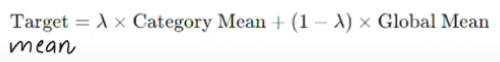

__$\lambda\;$ for every category will be different and will depend on number of occurence. It will tell how much percent is local mean and how much percent is global mean__
<br><br>
$$\lambda\;=\;f(n)$$


- $\lambda \propto\;$ number of occurence of the group in the output column  

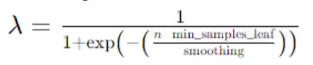

$$\lambda = \frac{1}{1+e^{\frac{-n}{\text{smoothing}}}}$$


- where n is number of times that group occured in the output column 


 


- $\lambda\;$ is just like __Sigmoid function__
 
 
 
- $\lambda\;$ always lies between 0 to 1.


- It is probabilistic in nature.




- $\lambda \uparrow\;$ more focus on Category mean

- $\lambda \downarrow\;$ more focus on Global mean

1. __Objective :__ The goal of target encoding, particularly when incorporating smoothing, is to
calculate a target mean for each category that takes into account both the global mean of the
target variable across all categories and the specific mean of the target variable for that
category. This approach aims to encode categorical variables in a way that reflects their
relationship with the target variable more accurately.


2. __Balancing with λ :__ To balance the influence of the global mean and the category-specific mean,
a smoothing factor λ is used. The value of λ determines how much weight is given to the
category mean versus the global mean for each category's encoded value.


3. __Dependency on n :__ λ is dependent on n, the number of observations (or rows) in that category.
The idea is that categories with a larger number of observations can rely more on their own
mean (category-specific mean) because it's considered more reliable due to the larger sample
size. Conversely, categories with fewer observations should rely more on the global mean to
avoid overfitting to potentially noisy estimates.


4. __Sigmoid Function for Probabilistic Interpretation :__ The use of a sigmoid function to represent
the relationship between λ and n introduces a smooth, probabilistic transition from reliance
on the global mean to reliance on the category mean. The sigmoid function ensures that as n
increases, λ adjusts in a non-linear and bounded manner, providing a controlled way to shift the weighting from the global mean towards the category-specific mean.


The sigmoid function's characteristics make it an ideal choice for this purpose, as it smoothly
transitions between 0 and 1, allowing λ to adjust in a way that reflects the increasing reliability
of the category mean with more observations, while also ensuring that the transition is
gradual and bounded, reducing the risk of sudden shifts in encoding based on the sample size.

### Role of min_samples_leaf

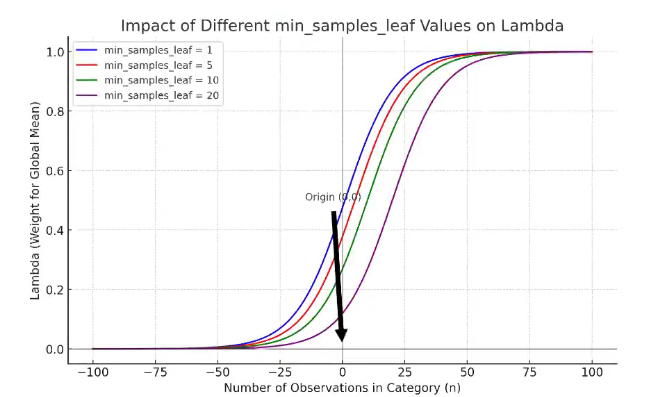

This geometrically means that the function becomes more conservative, requiring more
evidence (in the form of a larger number of observations) before moving away from the global
mean.

### Role of Smoothing:

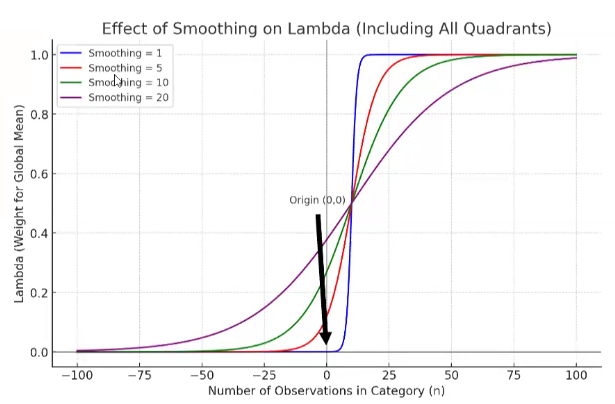

Geometrically, the smoothing factor in target encoding can be seen as controlling the
"sharpness" or "smoothness" of the transition in the sigmoid curve that adjusts λ.

It fine-tunes
how responsive the encoding is to the number of observations in each category, allowing for a
more nuanced balance between capturing category-specific effects and maintaining
generalizability to avoid overfitting.

### Advantages:


1. __Works well with high cardinality -> reduced feature space__


2. __Incorporates target information__


3. __Reduces overfitting with smoothing__


4. __Handling of unseen categories__


5. __Works with all types of problems binary, multiclass and regression__

### Disadvantages:


1. __Data Leakage__


2. __Complex usage of hyperparameters__


3. __Complexity of interpretation__

### Use-cases:


1. __High-cardinality features__


2. __Kaggle Competitions__


3. __Linear models__


4. __Time series forecasting__


5. __Imbalanced dataset__

## 9. Weight of Evidence

Weight of Evidence (WoE) encoding is a powerful technique used primarily in the domain of
credit risk modeling and other financial analytics, but its utility extends across various fields
where predictive modeling is employed. 


WoE encoding __transforms categorical variables into a
continuous scale,__ representing the logarithmic ratio of the distribution of "good" outcomes to
the distribution of "bad" outcomes within each category. 

### NOTE : This method is particularly useful for binary classification problems.

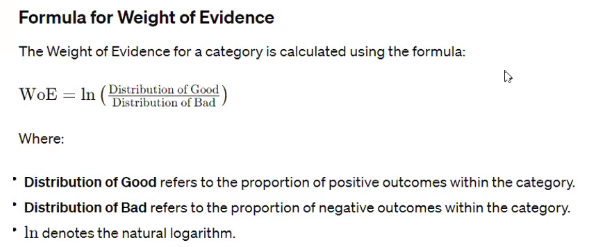

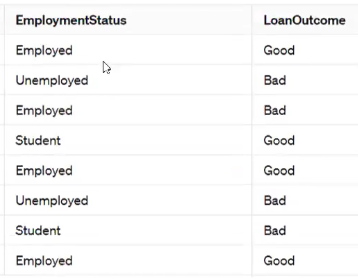

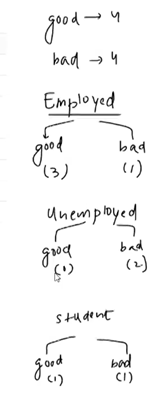

Overall good in output column = 4 and overall bad in output column = 4


$$\text{WOE for Employed} \Longrightarrow\;ln\;\Bigg(\frac{\frac{3}{4}}{\frac{1}{4}}\Bigg) = ln(3) = 1.09$$



$$\text{WOE for Unemployed} \Longrightarrow\;ln\;\Bigg(\frac{\frac{0}{4}}{\frac{2}{4}}\Bigg) = ln(0) =  -7.60\;\text{(changing 0 to 0.001)}$$



$$\text{WOE for Student} \Longrightarrow\;ln\;\Bigg(\frac{\frac{1}{4}}{\frac{1}{4}}\Bigg) = ln(1) = 0$$

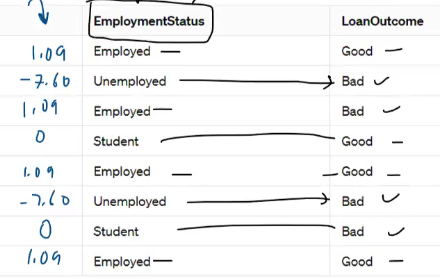

In [245]:
import pandas as pd
import category_encoders as ce

# Example dataset
data = {
    'Feature': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C'],
    'Target': [1, 0, 0, 1, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)
df

,Feature,Target
0,A,1
1,B,0
2,A,0
3,C,1
4,B,1
5,A,0
6,C,1
7,B,0
8,A,1
9,C,0


In [246]:
# Define the features and target
X = df[['Feature']]
y = df['Target']

# Initialize and fit the TargetEncoder
encoder = ce.WOEEncoder(cols=['Feature'])
X_encoded = encoder.fit_transform(X, y)

# Display the original and encoded data
df['Feature_Encoded'] = X_encoded
print(df)

  Feature  Target  Feature_Encoded
0       A       1         0.000000
1       B       0        -0.405465
2       A       0         0.000000
3       C       1         0.405465
4       B       1        -0.405465
5       A       0         0.000000
6       C       1         0.405465
7       B       0        -0.405465
8       A       1         0.000000
9       C       0         0.405465


### Advantages


1. __Captures the predictive power -> monotonic relationship with the target__


2. __Can handle high cardinality__


3. __Handles rare categories well__


4. __Good interpretation__

### Disadvantages


1. __Not suitable for multiclass classification and regression task.__


2. __Division by 0__


3. __Handling unseen categories__


4. __Data Leakage__

### Use-cases
Credit risk modelling/fraud detection/churn prediction/customer segmentation/insurance claim
prediction

## Words of Wisdom:

### One-Hot Encoder (OHE)
__Advice :__ Use for low cardinality features where the number of ___unique categories is small.___
Ideal for ___linear models and neural networks___ where preserving the distinction between
categories without implying order is crucial. Watch out for dimensionality explosion in
datasets with many categories.

### Ordinal Encoder (OE)
__Advice :__ Best when the ___categorical variable has a natural, meaningful order (e.g., rating
levels, educational status).___ Ensure your model can appropriately handle the imposed
ordinality. Not suitable for nominal data where no such order exists.

### Count Encoder
__Advice :__ Effective for capturing the frequency signal of categories, which can be
particularly informative in large datasets. However, be cautious with rare categories; their
low counts might lead to misleading interpretations. Pair with other encodings or use in
ensemble models to mitigate this.

### Binary Encoder
__Advice :__ A go-to for medium to ___high cardinality features___ where one-hot encoding would be
impractical. It efficiently reduces dimensionality while preserving more information than
simple ordinal encoding. Ensure binary patterns are meaningful for your model.

### Target Encoder
__Advice :__ Highly useful when ___the relationship between the category and the target is strong
and direct.___ Essential for complex models where capturing nuanced patterns is key. ___Always
use smoothing and cross-validation to prevent overfitting and leakage.___

### Weight of Evidence (WoE)
Advice: Primarily shines in ___binary classification___ tasks, especially in ___risk and financial
domains.___ It transforms categories into a measure of predictive power, making it
invaluable for interpretability and model performance. Ensure the target is binary and
handle ___categories with no events carefully to avoid infinite values.___

## Other Category Encoders : 

### 1. Ordinal Encoder
__How it works :__ Converts each category into a unique integer based on the
order of appearance or alphabetical order.

__Advantages :__

- Simple to implement and understand.

- Preserves order where it might be meaningful.


__Disadvantages :__

- Imposes an ordinal relationship that may not exist, potentially
misleading the model.


- Not suitable for non-ordinal data or models sensitive to numerical
relationships.



__Use Cases :__
- Tree-based models where ordinal relationships can be useful.


- Situations where the natural order of categories carries meaningful
information.

## General Wisdom:

__Understand Your Data :__ The effectiveness of each encoding technique is heavily
dependent on the nature of your categorical data and the specific problem you're solving.


__Experimentation is Key :__ There's rarely a one-size-fits-all solution. Experiment with
different encoders and validate their impact on your model's performance.


__Guard Against Leakage :__ Techniques that use target information (like Target Encoder and
WoE) require careful cross-validation strategies to avoid leaking target information into
your training process.


__Balance Complexity and Interpretability :__ More complex encodings can sometimes
improve model performance but at the cost of making your model harder to interpret.
Consider your project's goals and choose accordingly.